In [1]:
import torch
from torchvision.models.resnet import resnet18
from wilds import get_dataset
from wilds.common.data_loaders import get_eval_loader, get_train_loader
from wilds.common.grouper import CombinatorialGrouper

import torchvision.transforms as T
from tqdm import tqdm

/home/yasin/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = T.Compose([
    T.ToTensor()
])

dataset = get_dataset("camelyon17", root_dir="../../data/")
grouper = CombinatorialGrouper(dataset, ['hospital'])
train_set = dataset.get_subset("train", transform=transform)
test_set = dataset.get_subset("test", transform=transform)

train_loader = get_train_loader("standard", train_set, batch_size=64, num_workers=4)

In [4]:
model = resnet18(num_classes=2).to(device)

In [5]:
NUM_EPOCHS = 5

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-3)#, weight_decay=1e-2, momentum=0.9)

In [6]:
for i in range(NUM_EPOCHS):
    cum_loss = 0
    for i, (X, t, M) in enumerate(tqdm(train_loader)):

        optimizer.zero_grad()

        y = model(X.to(device))
        loss = criterion(y, t.to(device))

        loss.backward()
        optimizer.step()

        cum_loss += loss.item()

        if i % 500 == 499:
            print(f'Loss: {(cum_loss / 500):.4f}') 
            cum_loss = 0


 11%|█         | 503/4726 [00:15<02:08, 32.87it/s]

Loss: 0.2324


 21%|██        | 1003/4726 [00:31<01:53, 32.70it/s]

Loss: 0.1506


 32%|███▏      | 1503/4726 [00:46<01:39, 32.41it/s]

Loss: 0.1247


 42%|████▏     | 2003/4726 [01:02<01:25, 31.98it/s]

Loss: 0.1098


 53%|█████▎    | 2503/4726 [01:17<01:09, 32.09it/s]

Loss: 0.1008


 64%|██████▎   | 3003/4726 [01:33<00:54, 31.65it/s]

Loss: 0.0950


 74%|███████▍  | 3503/4726 [01:49<00:38, 31.81it/s]

Loss: 0.0904


 85%|████████▍ | 4003/4726 [02:04<00:22, 32.12it/s]

Loss: 0.0916


 95%|█████████▌| 4503/4726 [02:20<00:06, 32.00it/s]

Loss: 0.0824


 11%|█         | 505/4726 [00:15<02:12, 31.76it/s]

Loss: 0.0759


 21%|██▏       | 1005/4726 [00:31<01:57, 31.73it/s]

Loss: 0.0769


 32%|███▏      | 1505/4726 [00:47<01:41, 31.85it/s]

Loss: 0.0757


 42%|████▏     | 2005/4726 [01:02<01:25, 31.99it/s]

Loss: 0.0757


 53%|█████▎    | 2505/4726 [01:18<01:07, 32.95it/s]

Loss: 0.0724


 64%|██████▎   | 3005/4726 [01:33<00:51, 33.11it/s]

Loss: 0.0664


 74%|███████▍  | 3505/4726 [01:49<00:38, 31.34it/s]

Loss: 0.0695


 85%|████████▍ | 4005/4726 [02:04<00:23, 30.74it/s]

Loss: 0.0704


 95%|█████████▌| 4505/4726 [02:20<00:06, 32.70it/s]

Loss: 0.0632


 11%|█         | 505/4726 [00:15<02:09, 32.49it/s]

Loss: 0.0638


 21%|██▏       | 1005/4726 [00:31<01:56, 31.97it/s]

Loss: 0.0624


 32%|███▏      | 1505/4726 [00:46<01:42, 31.35it/s]

Loss: 0.0615


 42%|████▏     | 2005/4726 [01:02<01:23, 32.65it/s]

Loss: 0.0581


 53%|█████▎    | 2505/4726 [01:17<01:12, 30.77it/s]

Loss: 0.0559


 64%|██████▎   | 3005/4726 [01:32<00:52, 32.91it/s]

Loss: 0.0566


 74%|███████▍  | 3505/4726 [01:48<00:37, 32.94it/s]

Loss: 0.0543


 85%|████████▍ | 4005/4726 [02:03<00:22, 32.64it/s]

Loss: 0.0550


 95%|█████████▌| 4505/4726 [02:18<00:06, 32.93it/s]

Loss: 0.0540


 11%|█         | 505/4726 [00:15<02:08, 32.91it/s]

Loss: 0.0476


 21%|██▏       | 1005/4726 [00:30<01:53, 32.86it/s]

Loss: 0.0504


 32%|███▏      | 1505/4726 [00:46<01:37, 33.10it/s]

Loss: 0.0506


 42%|████▏     | 2005/4726 [01:01<01:25, 31.65it/s]

Loss: 0.0492


 53%|█████▎    | 2505/4726 [01:16<01:07, 32.67it/s]

Loss: 0.0477


 64%|██████▎   | 3005/4726 [01:32<00:53, 32.20it/s]

Loss: 0.0484


 74%|███████▍  | 3505/4726 [01:47<00:38, 32.03it/s]

Loss: 0.0478


 85%|████████▍ | 4005/4726 [02:03<00:22, 32.58it/s]

Loss: 0.0464


 95%|█████████▌| 4505/4726 [02:18<00:06, 33.28it/s]

Loss: 0.0461


 11%|█         | 505/4726 [00:15<02:09, 32.70it/s]

Loss: 0.0455


 21%|██▏       | 1005/4726 [00:31<01:56, 32.00it/s]

Loss: 0.0420


 32%|███▏      | 1505/4726 [00:46<01:41, 31.68it/s]

Loss: 0.0414


 42%|████▏     | 2005/4726 [01:02<01:25, 31.95it/s]

Loss: 0.0403


 53%|█████▎    | 2505/4726 [01:17<01:08, 32.20it/s]

Loss: 0.0446


 64%|██████▎   | 3005/4726 [01:33<00:53, 32.38it/s]

Loss: 0.0404


 74%|███████▍  | 3505/4726 [01:48<00:37, 32.14it/s]

Loss: 0.0401


 85%|████████▍ | 4005/4726 [02:04<00:22, 31.84it/s]

Loss: 0.0386


 95%|█████████▌| 4505/4726 [02:19<00:06, 31.66it/s]

Loss: 0.0369


100%|██████████| 4726/4726 [02:26<00:00, 32.17it/s]


### Cmpute Embeddings

In [7]:
grouper = CombinatorialGrouper(dataset, ['hospital'])
source_set = dataset.get_subset("train", transform=transform, frac=10_000/len(train_set))
target_set = dataset.get_subset("test", transform=transform, frac=10_000/len(test_set))

In [8]:
source_loader = get_eval_loader("standard", source_set, batch_size=64, num_workers=8)
target_loader = get_eval_loader("standard", target_set, batch_size=64, num_workers=8)

In [9]:
model.fc = torch.nn.Identity()

In [10]:
with torch.no_grad():
    source_embeddings = torch.cat([model(X.to(device)) for X, t, M in tqdm(source_loader)], dim=0)
    target_embeddings = torch.cat([model(X.to(device)) for X, t, M in tqdm(target_loader)], dim=0)

100%|██████████| 157/157 [00:01<00:00, 91.42it/s] 


In [11]:
len(source_embeddings), len(target_embeddings)

(10000, 10000)

In [12]:
all_embeddings = torch.cat([source_embeddings, target_embeddings], dim=0)
len(all_embeddings)

20000

In [13]:
source_embeddings.shape

torch.Size([10000, 512])

In [14]:
source_target = torch.cat([torch.zeros(10_000), torch.ones(10_000)])

In [15]:
source_target.shape

torch.Size([20000])

In [16]:
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [35]:
reducer = umap.UMAP(n_neighbors=1_000, n_epochs=1_000, verbose=True)

In [36]:
all_embeddings = all_embeddings.cpu()

In [37]:
X_scaled = StandardScaler().fit_transform(all_embeddings)

In [38]:
X_reduced = reducer.fit_transform(X_scaled)

UMAP(n_epochs=1000, n_neighbors=1000, verbose=True)
Sun Dec  3 20:40:46 2023 Construct fuzzy simplicial set
Sun Dec  3 20:40:46 2023 Finding Nearest Neighbors
Sun Dec  3 20:40:46 2023 Building RP forest with 12 trees
Sun Dec  3 20:40:46 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Sun Dec  3 20:41:42 2023 Finished Nearest Neighbor Search
Sun Dec  3 20:41:48 2023 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Sun Dec  3 20:42:49 2023 Finished embedding


In [39]:
X_reduced.shape

(20000, 2)

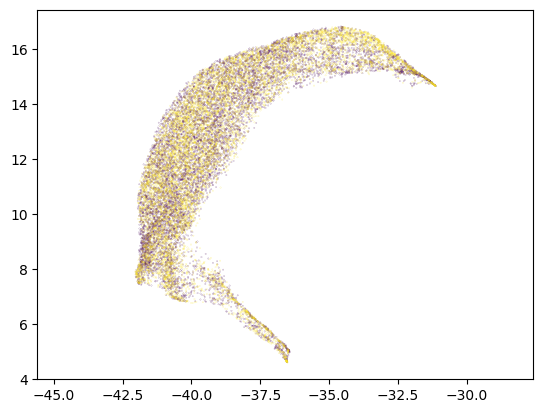

In [40]:
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=source_target,
    s=0.01
)
plt.gca().set_aspect('equal', 'datalim')